In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra


In [2]:
df = pd.read_csv("HR_SBA_Software.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [5]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("___")

satisfaction_level: Number of unique values 92
___
last_evaluation: Number of unique values 65
___
number_project: Number of unique values 6
___
average_montly_hours: Number of unique values 215
___
time_spend_company: Number of unique values 8
___
Work_accident: Number of unique values 2
___
left: Number of unique values 2
___
promotion_last_5years: Number of unique values 2
___
department: Number of unique values 10
___
salary: Number of unique values 3
___


In [6]:
object_col = [] # number of categorical features.
for column in df.columns:
    if df[column].dtype == object:
        print(df[column].value_counts())
        object_col.append(column)
        print("____")

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64
____
low       7316
medium    6446
high      1237
Name: salary, dtype: int64
____


In [7]:
num_col = [] # number of numerical features.
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 2: #nuique to ignore bools  
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        num_col.append(column)
        print("_____")

satisfaction_level : Minimum: 0.09, Maximum: 1.0
_____
last_evaluation : Minimum: 0.36, Maximum: 1.0
_____
number_project : Minimum: 2, Maximum: 7
_____
average_montly_hours : Minimum: 96, Maximum: 310
_____
time_spend_company : Minimum: 2, Maximum: 10
_____


In [8]:
print("categorical : ",len(object_col))
print("numerical : ",len(num_col)) 

categorical :  2
numerical :  5


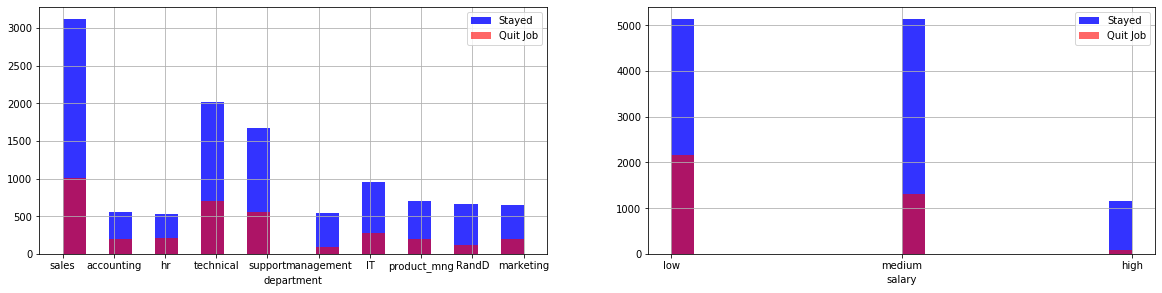

In [9]:
# quit/stayed by (department / salary).  
plt.figure(figsize=(20, 10))
for i, column in enumerate(object_col, 1):
    plt.subplot(2, 2, i)
    df[df["left"] == 0][column].hist(bins=20, color='blue', label='Stayed', alpha=0.8)
    df[df["left"] == 1][column].hist(bins=20, color='red', label='Quit Job', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

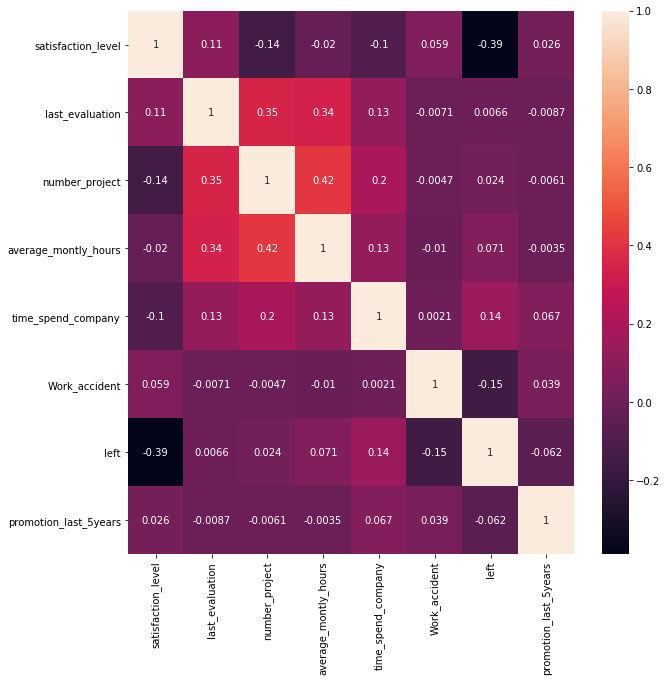

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

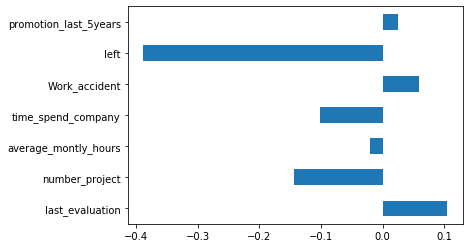

In [11]:
df.drop('satisfaction_level',1).corrwith(df.satisfaction_level).plot(kind='barh')